2138


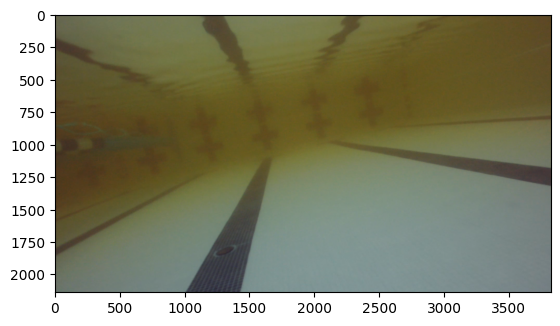

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import LincolnLabsSecretSauce

img = cv2.imread('lanes.png')

plt.imshow(img)

h,w,c = img.shape
print(h)

In [2]:
lines = LincolnLabsSecretSauce.detect_lines(img, 49, 50, 3, 500, 40)
print(lines)


[[[3052 1178 3726 1309]]

 [[1044 2066 1405 1465]]

 [[1006 2132 1393 1488]]

 [[1066 2026 1433 1415]]

 [[1427 2133 1553 1587]]]


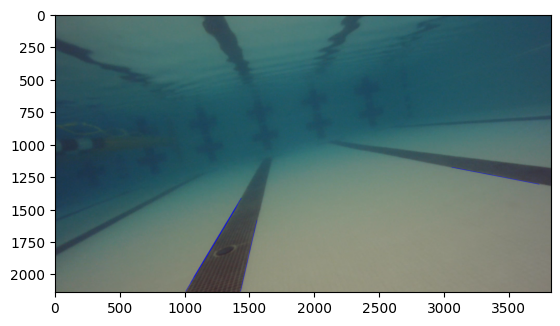

In [3]:
plt.imshow(cv2.cvtColor(LincolnLabsSecretSauce.draw_lines(img, lines), cv2.COLOR_BGR2RGB))


([0.1943620178041543, -1.664819944598338, -1.6640826873385013, -1.664850136239782, -4.333333333333333], [7991.236641221374, 1000.7520798668885, 1002.3944099378882, 998.7266775777414, 1425.8461538461538])


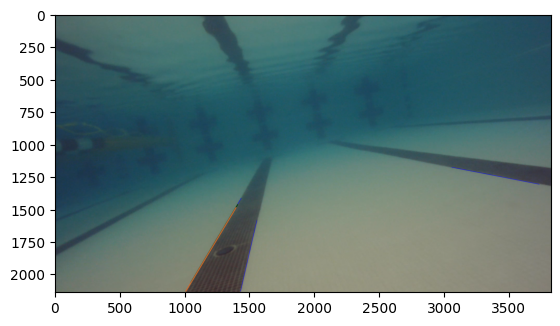

In [4]:

print(LincolnLabsSecretSauce.get_slopes_intercepts(lines))

lanes = LincolnLabsSecretSauce.detect_lanes(lines)


plt.imshow(cv2.cvtColor(LincolnLabsSecretSauce.draw_lanes(img, lanes), cv2.COLOR_BGR2RGB))
